## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/Colab Notebooks/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
df_labels = pd.read_csv('labels.csv')

In [10]:
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [11]:
df_labels.groupby('breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


In [12]:
df_labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [0]:
df_labels.iloc[:, 1] = labelencoder_x.fit_transform(df_labels.iloc[:, 1]) #applying on 'breed' column

In [15]:
df_labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,19
1,001513dfcb2ffafc82cccf4d8bbaba97,37
2,001cdf01b096e06d78e9e5112d419397,85
3,00214f311d5d2247d5dfe4fe24b2303d,15
4,0021f9ceb3235effd7fcde7f7538ed62,49
5,002211c81b498ef88e1b40b9abf84e1d,10
6,00290d3e1fdd27226ba27a8ce248ce85,10
7,002a283a315af96eaea0e28e7163b21b,18
8,003df8b8a8b05244b1d920bb6cf451f9,7
9,0042188c895a2f14ef64a918ed9c7b64,97


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
channels = 3

In [17]:
from tqdm import tqdm
import cv2

x_train = []
y_train = []
for f, img in tqdm(df_labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
  train_img_reshape = cv2.resize(train_img, (img_rows,img_cols))
  x_train.append(train_img_reshape)
  y_train.append(img)

100%|██████████| 10222/10222 [00:31<00:00, 326.82it/s]


In [18]:
y_train[0]

19

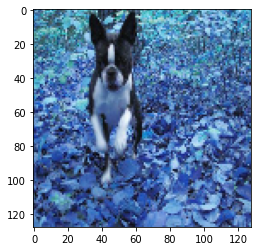

In [19]:
plt.imshow(x_train[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import pandas as pd
dum = pd.get_dummies(y_train)
encoded_labels = dum
y_train = dum
y_train = np.array(y_train)

In [21]:
y_train[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [22]:
x_train = np.array(x_train)
x_train.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [23]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=6)
print (len(x_train2))
print (len(x_val))

8177
2045


In [24]:
x_train2 = x_train2.reshape(x_train2.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)
x_train2 = x_train2/255
x_val = x_val/255
print (x_train2.shape)
print (x_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)


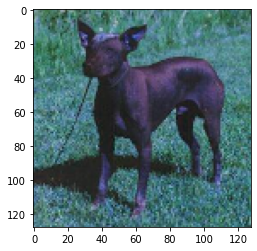

In [25]:
plt.imshow(x_train2[0])

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
df_img = pd.read_csv('sample_submission.csv')

In [0]:
test_img = df_img['id']

In [28]:
test_img

0        000621fb3cbb32d8935728e48679680e
1        00102ee9d8eb90812350685311fe5890
2        0012a730dfa437f5f3613fb75efcd4ce
3        001510bc8570bbeee98c8d80c8a95ec1
4        001a5f3114548acdefa3d4da05474c2e
                       ...               
10352    ffeda8623d4eee33c6d1156a2ecbfcf8
10353    fff1ec9e6e413275984966f745a313b0
10354    fff74b59b758bbbf13a5793182a9bbe4
10355    fff7d50d848e8014ac1e9172dc6762a3
10356    fffbff22c1f51e3dc80c4bf04089545b
Name: id, Length: 10357, dtype: object

Run the below code to load the test image files in x_test_feature

In [29]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:31<00:00, 332.65it/s]


Normalize the test data and convert it into 4 dimensions

In [30]:
x_test_feature = np.array(x_test_feature)
#x_test_feature = x_test_feature.reshape(x_test_feature.shape[0],128,128,1)
x_test_feature = x_test_feature/255
x_test_feature.shape

(10357, 128, 128, 3)

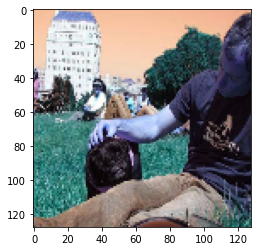

In [31]:
plt.imshow(x_test_feature[3])

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [39]:
model = Sequential()

#1st layer
model.add(Convolution2D(64,5,5, input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3, scale=False))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
#2nd layer
model.add(Convolution2D(64, 3,3))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3, scale=False))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(120))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
epochs =10
batch_size = 128

In [42]:
history = model.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

Train on 7359 samples, validate on 818 samples
Epoch 1/10
7359/7359 [==============================] - 59s 8ms/step - loss: 4.9845 - accuracy: 0.0114 - val_loss: 5.4152 - val_accuracy: 0.0159
Epoch 2/10
7359/7359 [==============================] - 58s 8ms/step - loss: 4.7004 - accuracy: 0.0247 - val_loss: 8.6230 - val_accuracy: 0.0220
Epoch 3/10
7359/7359 [==============================] - 56s 8ms/step - loss: 4.5595 - accuracy: 0.0351 - val_loss: 14.4881 - val_accuracy: 0.0086
Epoch 4/10
7359/7359 [==============================] - 58s 8ms/step - loss: 4.4115 - accuracy: 0.0497 - val_loss: 9.7126 - val_accuracy: 0.0122
Epoch 5/10
7359/7359 [==============================] - 60s 8ms/step - loss: 4.2652 - accuracy: 0.0677 - val_loss: 8.1627 - val_accuracy: 0.0196
Epoch 6/10
7359/7359 [==============================] - 57s 8ms/step - loss: 4.1010 - accuracy: 0.0856 - val_loss: 6.1933 - val_accuracy: 0.0416
Epoch 7/10
7359/7359 [==============================] - 57s 8ms/step - loss: 3.909

model accuracy : 0.05330073460936546


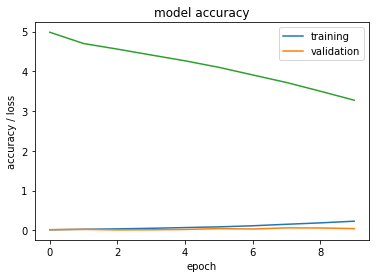

In [43]:
loss,accuracy1  = model.evaluate(x_val, y_val, verbose=False)
print("model accuracy :" , accuracy1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(x_train2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

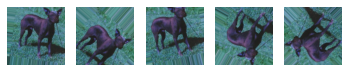

In [45]:
from matplotlib import pyplot as plt
train_generator = datagen.flow(x_train2[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(train_generator.next().squeeze(), cmap='Blues')
    plt.plot()
plt.show()

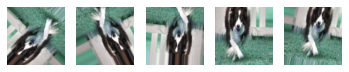

In [46]:
from matplotlib import pyplot as plt
val_generator = datagen.flow(x_val[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(val_generator.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [52]:
history =model.fit(datagen.flow(x_train2, y_train2,batch_size=1), steps_per_epoch=x_train2.shape[0], epochs=10, validation_data=(x_val, y_val), callbacks=callback_list)

Epoch 1/10
8177/8177 [==============================] - 215s 26ms/step - loss: 4.7812 - accuracy: 0.0100 - val_loss: 4.7899 - val_accuracy: 0.0088
Epoch 2/10
   6/8177 [..............................] - ETA: 3:22 - loss: 4.8753 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


8177/8177 [==============================] - 215s 26ms/step - loss: 4.7792 - accuracy: 0.0113 - val_loss: 4.7900 - val_accuracy: 0.0068
Epoch 3/10
8177/8177 [==============================] - 218s 27ms/step - loss: 4.7791 - accuracy: 0.0104 - val_loss: 4.7904 - val_accuracy: 0.0068
Epoch 4/10
8177/8177 [==============================] - 219s 27ms/step - loss: 4.7792 - accuracy: 0.0111 - val_loss: 4.7903 - val_accuracy: 0.0068
Epoch 5/10
8177/8177 [==============================] - 219s 27ms/step - loss: 4.7791 - accuracy: 0.0103 - val_loss: 4.7897 - val_accuracy: 0.0068
Epoch 6/10
8177/8177 [==============================] - 216s 26ms/step - loss: 4.7791 - accuracy: 0.0105 - val_loss: 4.7898 - val_accuracy: 0.0068
Epoch 7/10
8177/8177 [==============================] - 226s 28ms/step - loss: 4.7790 - accuracy: 0.0115 - val_loss: 4.7895 - val_accuracy: 0.0088
Epoch 8/10
8177/8177 [==============================] - 230s 28ms/step - loss: 4.7791 - accuracy: 0.0117 - val_loss: 4.7897 - val

model accuracy : 0.0068459659814834595


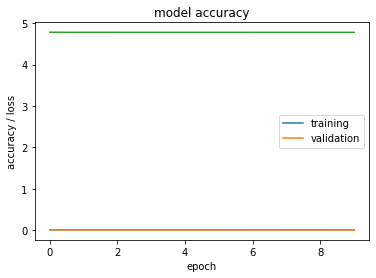

In [53]:
loss,accuracy1  = model.evaluate(x_val, y_val, verbose=False)
print("model accuracy :" , accuracy1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [55]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
%tensorflow_version 2.x

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [76]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import *
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling3D


x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
# let's add two fully-connected layer
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
# and a softmax layer for 120 classes
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
model_VGG = Model(inputs=base_model.input, outputs=predictions)

AttributeError: ignored

In [ ]:
#I am not able to resolve the error, please allow some time to resolve this error.

In [74]:
model_VGG.summary()

NameError: ignored

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
  #if('conv' in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# Loss and Optimizer
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model_VGG.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model_VGG.fit(x_train2, y_train2,epochs=10, batch_size=128, verbose=1,validation_data=(x_val,y_val))